In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [19]:
DATA_PATH = '../data/'
# Read the CSV file into a DataFrame
df = pd.read_csv(DATA_PATH + 'raw/filtered.tsv', delimiter='\t')
# Display the first few rows of the dataset
df.head()

,id,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [12]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           577777 non-null  int64  
 1   reference    577777 non-null  object 
 2   translation  577777 non-null  object 
 3   similarity   577777 non-null  float64
 4   lenght_diff  577777 non-null  float64
 5   ref_tox      577777 non-null  float64
 6   trn_tox      577777 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 30.9+ MB


In [13]:
# Generate summary statistics for numerical columns
df.describe()

,id,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000,577777.000000
mean,288888.000000,0.758469,0.157652,0.541372,0.434490
std,166789.997578,0.092695,0.108057,0.457571,0.458904
min,0.000000,0.600001,0.000000,0.000033,0.000033
25%,144444.000000,0.681105,0.066667,0.012171,0.000707
50%,288888.000000,0.754439,0.141791,0.806795,0.085133
75%,433332.000000,0.831244,0.238095,0.990469,0.973739
max,577776.000000,0.950000,0.400000,0.999724,0.999730


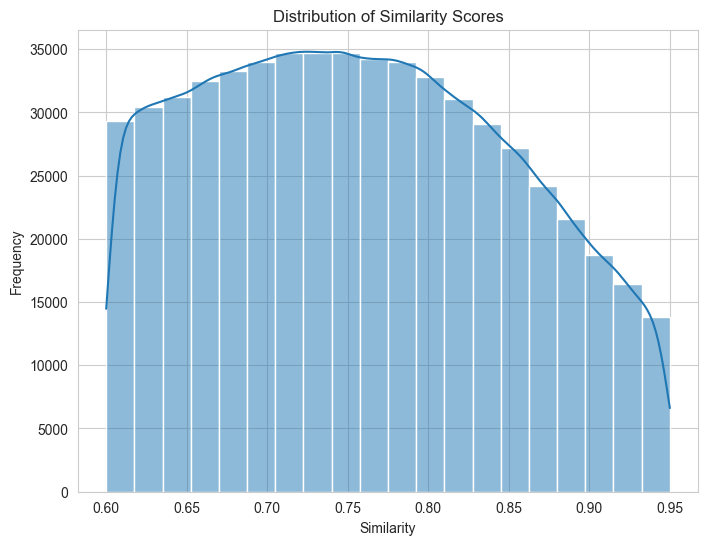

In [14]:
# Histogram of the 'similarity' column
plt.figure(figsize=(8, 6))
sns.histplot(df['similarity'], bins=20, kde=True)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id             0
reference      0
translation    0
similarity     0
lenght_diff    0
ref_tox        0
trn_tox        0
dtype: int64


In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate Rows:", duplicates)

Duplicate Rows: 0


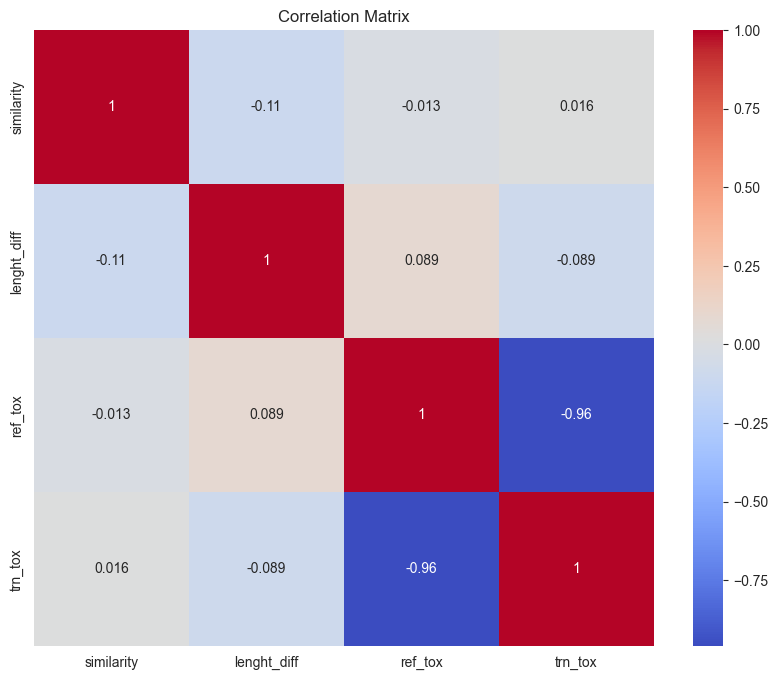

In [8]:
# Select only the numeric columns for correlation analysis
numeric_columns = df[['similarity', 'lenght_diff', 'ref_tox', 'trn_tox']]

# Calculate the correlation matrix for the selected numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:
# Group by 'ref_tox' and calculate the mean similarity
mean_similarity_by_ref_tox = df.groupby('ref_tox')['similarity'].mean()
print(mean_similarity_by_ref_tox)


ref_tox
0.000033    0.605479
0.000033    0.617393
0.000034    0.668596
0.000034    0.841094
0.000034    0.718270
              ...   
0.999722    0.824476
0.999722    0.715508
0.999723    0.711188
0.999723    0.698898
0.999724    0.729428
Name: similarity, Length: 435822, dtype: float64


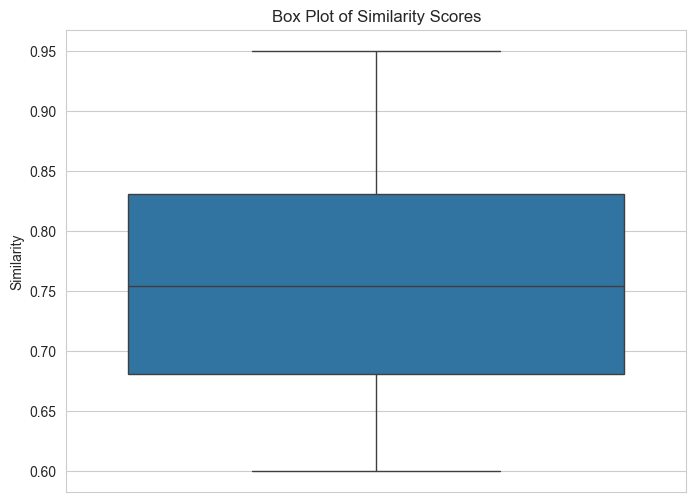

In [16]:
# Box plot for 'similarity' column to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='similarity')
plt.title('Box Plot of Similarity Scores')
plt.ylabel('Similarity')
plt.show()


Select the relevant columns for training the text de-toxification model, which are 'reference', 'translation', 'ref_tox', and 'trn_tox'.
Split the data into training (70%), validation (10%), and test (20%) sets using

In [20]:
# Select the relevant columns for training the de-toxification model
selected_columns = ['reference', 'translation', 'ref_tox', 'trn_tox']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

In [24]:
# Split the data into training, validation, and test sets
# 70% for training, 10% for validation, and 20% for testing
train_data, temp_data = train_test_split(selected_data, test_size=0.3, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.67, random_state=42)

# Save the split datasets to separate CSV files
train_data.to_csv(DATA_PATH + 'interim/train.csv', index=False)
valid_data.to_csv(DATA_PATH + 'interim/validation.csv', index=False)
test_data.to_csv(DATA_PATH + 'interim/test.csv', index=False)
